# Model-free Renewable Scenario Generation Using Generative Adversarial Networks

### Yize Chen, Yishen Wang, Daniel Kirschen and Abosen Zhang

Grossly implemented by Pedro Bittencourt based on Yize Chen's original code on https://github.com/chennnnnyize/

For event-based scenario generation and spatial scenario generation, implement the code with labels or 
reshape the imput samples to spatio-temporal samples respectively.
16 is the maximum value for wind capacity we use. Change to the customized max value for normalized data
import ipdb

#Changes
    Learning rate (increased from 0.0002 to 0.002)
    n_epochs (increased from 60 to 200)
    layer dimensions (to those specified in the paper)
   

In [2]:
import os
import pandas as pd
import numpy as np
from model_v2 import *
from util import *
from load import load_wind, load_solar_data, load_wind_data_spatial #Change the data source for other tasks
from numpy import shape
import csv
import matplotlib.pyplot as plt
import gc 
gc.collect()
tf.compat.v1.disable_eager_execution()


## Setup variables

In [3]:
n_epochs = 120 #Number of overall training epochs on training data
learning_rate = 0.00005 
batch_size = 32
image_shape = [24,24,1] #The shape for input data
dim_z = 100 #input dimension for samples
dim_W1 = 2048 #first layer neurons
dim_W2 = 1024 #second layer neurons
dim_W3 = 128 #third layer #16 is the maximum value for wind capacity we use. Change to your max value here
dim_channel = 1 #reserved for future use if multi=channels
mu, sigma = 0, 0.1 # input Gaussian
events_num=5 #kind of events

visualize_dim=32
generated_dim=32

## Load datasets

Change here for different datasets

In [4]:
#Comment out corresponding part to reproduce the results for 
#wind_events_generation, solar_events_generation, spatial_generation respectively
trX, trY = load_wind()
#trX, trY=load_solar()
#trX, trY=load_spatial()

print("shape of training samples ", shape(trX))
print("Training data loaded")

(105120, 52)
Maximum value of wind 16.0
(105120, 52)
Shape TrX (9464, 576)
Label shape (9464, 1)
shape of training samples  (9464, 576)
Training data loaded


## Initialize GAN

In [6]:
dcgan_model = GAN(
    dim_y=events_num,#The parameters for controlling the number of events
    batch_size=batch_size,
    image_shape=image_shape,
    dim_z=dim_z,
    dim_W1=dim_W1,
    dim_W2=dim_W2,
    dim_W3=dim_W3
    # Change parameters based on number of events
    #change paprameters here for model revision
    #dim_z: the dimension for input noise
    #W1,W2,W3: the dimension for convolutional layers
        )
print("W_DCGAN model initialized")


W_DCGAN model initialized


In [7]:
#Z_tf,Y_tf: placeholder
#image_tf: image placeholder
#d_cost_tf, g_cost_tf: discriminator and generator cost#16 is the maximum value for wind capacity we use. Change to your max value here
#p_real, p_gen: the output of discriminator to judge real/generated
Z_tf, Y_tf, image_tf, d_cost_tf, g_cost_tf, p_real, p_gen = dcgan_model.build_model()
sess = tf.compat.v1.InteractiveSession()
saver = tf.compat.v1.train.Saver(max_to_keep=10)

discrim_vars = filter(lambda x: x.name.startswith('discrim'), tf.compat.v1.trainable_variables())
gen_vars = filter(lambda x: x.name.startswith('gen'), tf.compat.v1.trainable_variables())
discrim_vars = [i for i in discrim_vars]
gen_vars = [i for i in gen_vars]

train_op_discrim = (tf.compat.v1.train.RMSPropOptimizer(learning_rate=1e-4).minimize(-d_cost_tf, var_list=discrim_vars))
train_op_gen = (tf.compat.v1.train.RMSPropOptimizer(learning_rate=1e-4).minimize(g_cost_tf, var_list=gen_vars))

Z_tf_sample, Y_tf_sample, image_tf_sample = dcgan_model.samples_generator(batch_size=visualize_dim)
tf.compat.v1.global_variables_initializer().run()

Zs = np.random.normal(mu, sigma, size=[batch_size, dim_z]).astype(np.float32)
Y_np_sample = OneHot(np.random.randint(events_num, size=[visualize_dim]), n=events_num)
print(Y_np_sample)
iterations = 0
k = 4 #control the balance of training D and G

gen_loss_all=[]#16 is the maximum value for wind capacity we use. Change to your max value here
P_real=[]
P_fake=[]
P_distri=[]
discrim_loss=[]

Initializing the generator
Input Z shape (32, 100)
Input Y shape (32, 5)
Z shape (32, 105)
h1 shape (32, 2048)
h1 shape (32, 2053)
h2 shape (32, 36864)
h2 shape (32, 6, 6, 1024)
shape of yb new (32, 6, 6, 5)
h2 shape (32, 6, 6, 1029)
h3 shape (32, 12, 12, 128)
h3 shape (32, 12, 12, 133)
Initializing the discriminator
Y shape (32, 5)
image shape (32, 24, 24, 1)
yb shape (32, 1, 1, 5)
X shape (32, 24, 24, 6)
h1 shape (32, 12, 12, 128)
h1 shape (32, 12, 12, 133)
h2 shape (32, 6, 6, 1024)
discri shape (32, 2048)
Initializing the discriminator
Y shape (32, 5)
image shape (32, 24, 24, 1)
yb shape (32, 1, 1, 5)
X shape (32, 24, 24, 6)
h1 shape (32, 12, 12, 128)
h1 shape (32, 12, 12, 133)
h2 shape (32, 6, 6, 1024)
discri shape (32, 2048)
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]]


In [ ]:
#begin training
for epoch in range(n_epochs):
    print("epoch" + str(epoch))
    index = np.arange(len(trY))
    np.random.shuffle(index)
    trX = trX[index]
    trY = trY[index]
    trY2 = OneHot(trY, n=events_num)

    for start, end in zip(
            range(0, len(trY), batch_size),
            range(batch_size, len(trY), batch_size)
            ):

        Xs = trX[start:end].reshape([-1, 24, 24, 1])
        Ys = trY2[start:end]

        #use uniform or Gaussian distribution data to generate adversarial samples
        Zs = np.random.normal(mu, sigma, size=[batch_size, dim_z]).astype(np.float32)

        #for each iteration, generate g and d respectively, k=2
        if np.mod( iterations, k) == 0:
            _, gen_loss_val = sess.run(
                    [train_op_gen, g_cost_tf],
                    feed_dict={
                        Z_tf:Zs,
                        Y_tf:Ys,
                        image_tf: Xs
                        })
            discrim_loss_val, p_real_val, p_gen_val = sess.run([d_cost_tf,p_real,p_gen], feed_dict={Z_tf:Zs, image_tf:Xs, Y_tf:Ys})

            '''print("=========== updating G ==========")
            print("iteration:", iterations)
            print("gen loss:", gen_loss_val)
            print("discrim loss:", discrim_loss_val)'''

        else:
            _, discrim_loss_val = sess.run(
                    [train_op_discrim, d_cost_tf],
                    feed_dict={
                        Z_tf:Zs,
                        Y_tf:Ys,
                        image_tf:Xs
                        })

            '''print("=========== updating D ==========")
            print("iteration:", iterations)
            print("gen loss:", gen_loss_val)
            print("discrim loss:", discrim_loss_val)'''

            gen_loss_val, p_real_val, p_gen_val = sess.run([g_cost_tf, p_real, p_gen],
                                                       feed_dict={Z_tf: Zs, image_tf: Xs, Y_tf: Ys})
        P_real.append(p_real_val.mean())
        P_fake.append(p_gen_val.mean())
        '''gen_loss_val, p_real_val, p_gen_val = sess.run([g_cost_tf, p_real, p_gen],
                                                       feed_dict={Z_tf: Zs, image_tf: fake_data, Y_tf: Ys})'''
        discrim_loss.append(discrim_loss_val)


        if np.mod(iterations, 1000) == 0:
            print("iterations ", iterations)
            print("Average P(real)=", p_real_val.mean())
            print("Average P(gen)=", p_gen_val.mean())
            print("Discrim loss:", discrim_loss_val)
            Y_np_sample = OneHot(np.random.randint(5, size=[visualize_dim]), n=events_num)
            Z_np_sample = np.random.normal(mu, sigma, size=[batch_size, dim_z]).astype(np.float32)
            generated_samples = sess.run(
                image_tf_sample,
                feed_dict={
                    Z_tf_sample: Z_np_sample,
                    Y_tf_sample: Y_np_sample
                })
            generated_samples=generated_samples.reshape([-1,576])
            generated_samples = generated_samples * 16 #16 is the maximum value for wind capacity we use. Change to your max value here
            csvfile=open('%s.csv' %iterations, 'w')
            writer=csv.writer(csvfile)
            writer.writerows(generated_samples)

        iterations += 1

epoch0
iterations  0
Average P(real)= 0.33394969
Average P(gen)= 0.33683792
Discrim loss: -189.2832


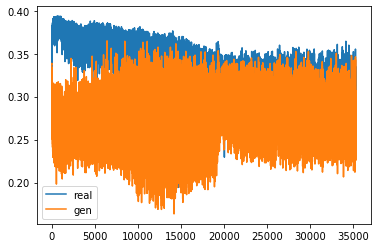

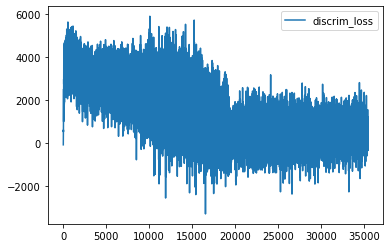

In [58]:
Y_np_sample = OneHot(np.random.randint(5, size=[visualize_dim]), n=events_num) 
Zs = np.random.normal(mu, sigma, size=[batch_size, dim_z]).astype(np.float32)
generated_samples = sess.run(
    image_tf_sample,
    feed_dict={
        Z_tf_sample: Z_np_sample,
        Y_tf_sample: Y_np_sample
    })
generated_samples=generated_samples.reshape([-1,576])
generated_samples = generated_samples * 16 #16 is the maximum value for wind capacity we use. Change to your max value here
csvfile=open('sample1.csv', 'w')
writer=csv.writer(csvfile)
writer.writerows(generated_samples)
csvfile=open('label1.csv', 'w')
writer=csv.writer(csvfile)
writer.writerows(Y_np_sample)


#plot the loss and P_real as well as P_fake
#print("P_real",P_real)
#print("P_fake",P_fake)

plt.plot(P_real,label="real")
plt.plot(P_fake,label="gen")
plt.legend()
#savefig('TrainingEvolutionWindData30012020_200epochs.png', bbox_inches='tight')
plt.show()

plt.plot(discrim_loss,label="discrim_loss")
plt.legend()
#savefig('WdistanceWindData30012020_200epochs.png', bbox_inches='tight')
plt.show()

sess.close()